# [ML - Exercise](https://fhict.instructure.com/courses/13057/assignments/219946?module_item_id=921371)


Fashion-MNIST Links to an external site.is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

Here's an example how the data looks (each class takes three-rows):

![fashion-mnist-sprite.png](../files/fashion-mnist-sprite.png)

<!-- <img src="../Images/fashion-mnist-sprite.png" width="800" height="400">  -->

### Part 1 Modelling, PCA and evaluation

1. Load the dataset and split into a training set and test set. and split it into a training set and a test set.
2. Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.
3. Next, use PCA to reduce the dataset's dimensionality (with an explained variance ratio of 95%).
4. Train a new Random Forest classifier on the reduced dataset and measure how long it takes.
5. Was training much faster?
6. Evaluate the classifier on the test set: how does it compare to the previous classifier?
7. Apply softmax regression (using the original dataset) and time how long it takes, then evaluate the resulting model on the test set.
8. Apply softmax regression (using the reduced dataset) and time how long it takes, then evaluate the resulting model on the test set.
9. What can you conclude from the results?


### Part 2. Visualisation

1. Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. Use dimensionality on a random subset of 12,500 images.
2. Plot a scatterplot using different colours for each class.
3. What can you conclude?
4. Now try t-SNE for a combination of 3 labels: sneaker, bag and t-shirt

#################################################################

# Code



### Imports

In [1]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd

import matplotlib
from matplotlib import pyplot as plt

import numpy as np

import sklearn as sk
from sklearn import tree
from sklearn import ensemble
from sklearn import decomposition
from sklearn import linear_model 
from sklearn import manifold 

import seaborn as sns

from sklearn.metrics import accuracy_score

######################

print(tf.__version__)
print(keras.__version__)
print(matplotlib.__version__)
print(pd.__version__)
print(np.__version__)
print(sk.__version__)
print(sns.__version__)

2023-03-03 15:41:03.856363: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.11.0
2.11.0
3.7.0
1.5.3
1.23.4
1.2.1
0.12.2


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
x_train_items, train_item_w, train_item_h = x_train.shape
x_train_reshaped = x_train.reshape((x_train_items, train_item_w * train_item_h))


x_test_items, test_item_w, test_item_h = x_test.shape
x_test_reshaped = x_test.reshape((x_test_items, test_item_w * test_item_h))

#### Decision Tree (extra)

In [4]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train_reshaped, y_train)

DecisionTreeClassifier()

In [5]:
pred = clf.predict(x_test_reshaped)
acc = accuracy_score(pred, y_test)
acc

0.7873

## Part 1

#### Models



##### Forest with no PCA reduction

In [6]:
x_train_items, train_item_w, train_item_h = x_train.shape
x_train_reshaped = x_train.reshape((x_train_items, train_item_w * train_item_h))


x_test_items, test_item_w, test_item_h = x_test.shape
x_test_reshaped = x_test.reshape((x_test_items, test_item_w * test_item_h))


In [7]:
#%%time
clf = ensemble.RandomForestClassifier()

clf.fit(x_train_reshaped, y_train)

RandomForestClassifier()

In [8]:
pred = clf.predict(x_test_reshaped)
acc = accuracy_score(pred, y_test)
acc


0.8773

##### PCA reduction

In [9]:
pca = decomposition.PCA(n_components=0.95, svd_solver='full')
pca.fit(x_train_reshaped)

x_train_pca =  pca.transform(x_train_reshaped)

print (pca.explained_variance_ratio_.cumsum())


#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
#
# if 0 < n_components < 1 and svd_solver == ‘full’, 
# select the number of components such that the amount of variance 
# that needs to be explained is greater than the percentage specified by n_components

[0.29039228 0.46794538 0.5281376  0.57771188 0.61618843 0.65079612
 0.67421303 0.69326717 0.7067656  0.71990827 0.72983702 0.73896957
 0.7466275  0.75322455 0.75930306 0.76520127 0.77072062 0.77596562
 0.7805464  0.78510155 0.78943839 0.79350936 0.79735694 0.80108246
 0.80469352 0.80820008 0.8115325  0.81472609 0.81780672 0.82073945
 0.82349548 0.8261461  0.82878313 0.83134148 0.83380361 0.83616262
 0.83846552 0.84072074 0.8429055  0.84499874 0.84700157 0.84895896
 0.85090586 0.85273369 0.85448723 0.85620649 0.85789441 0.85953416
 0.86114324 0.8626917  0.86421465 0.8657151  0.86718305 0.86861617
 0.86999894 0.87136891 0.87268046 0.87396892 0.87524141 0.87649992
 0.87771445 0.87891643 0.88009786 0.88126044 0.88241627 0.88353922
 0.88464997 0.88574666 0.88679794 0.88784453 0.88887554 0.88988605
 0.890864   0.89182089 0.89276004 0.89369387 0.89461917 0.89552173
 0.89641498 0.8972868  0.89814088 0.89898378 0.89980892 0.90062313
 0.90142826 0.90222577 0.90300219 0.90377166 0.90453547 0.9052

##### Forest with PCA reduction

In [10]:
clf_reduc = ensemble.RandomForestClassifier()
clf_reduc.fit(x_train_pca, y_train)

RandomForestClassifier()

In [11]:
x_test_pca =  pca.transform(x_test_reshaped)

In [12]:
pred_reduc = clf_reduc.predict(x_test_pca)
acc_reduc = accuracy_score(pred_reduc, y_test)
acc_reduc

0.8569

##### Softmax

In [13]:
clf_softmax = linear_model.LogisticRegression()

clf_softmax.fit(x_train_reshaped, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
pred_softmax = clf_softmax.predict(x_test_reshaped)
acc_softmax = accuracy_score(pred_softmax, y_test)
acc_softmax


0.8412

##### Softmax with PCA

In [15]:
clf_softmax_pca = linear_model.LogisticRegression()

clf_softmax_pca.fit(x_train_pca, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
pred_softmax_pca = clf_softmax_pca.predict(x_test_pca)
acc_softmax_pca = accuracy_score(pred_softmax_pca, y_test)
acc_softmax_pca

0.8425

### Answers



5. Was training much faster? (Random forest with PCA vs Random forest without)

ANS

6. Evaluate the classifier on the test set: how does it compare to the previous classifier? (Random forest with PCA vs Random forest without)

ANS

9. What can you conclude from the results? (softmax with PCA vs softmax without PCA)

ANS


## Part 2



### Visualizations

In [17]:
# X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
# X_embedded = manifold.TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X)

# print(X.shape)
# print(X_embedded.shape)
# print("---------")


In [18]:
x_train_comb = np.column_stack((x_train_reshaped, y_train))

x_train_sub = x_train_comb[np.random.choice(x_train_comb.shape[0], 12500, replace=False)]

print(x_train_sub.shape)

y_train_sub = x_train_sub[0:12500, -1]

x_train_sub = x_train_sub[0:12500, 0:784]

print(x_train_sub.shape)
print(y_train_sub.shape)

(12500, 785)
(12500, 784)
(12500,)


In [19]:
x_train_embedded = manifold.TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(x_train_sub)
print(x_train_embedded.shape)
print(x_train_embedded)

(12500, 2)
[[-69.7941    -15.002484 ]
 [-11.089965  -22.242592 ]
 [ 49.675518  -22.671345 ]
 ...
 [  9.853884   29.269226 ]
 [ -2.8604906 -62.237453 ]
 [ 25.856058   68.09237  ]]


In [20]:
x_train_comb = np.column_stack((x_train_embedded, y_train_sub))

df = pd.DataFrame(x_train_comb, columns = ['Column_A','Column_B','Type'])
df

,Column_A,Column_B,Type
0,-69.794098,-15.002484,2.0
1,-11.089965,-22.242592,2.0
2,49.675518,-22.671345,9.0
3,4.062972,-0.401104,3.0
4,-65.574127,37.071404,0.0
...,...,...,...
12495,63.418777,-9.033229,7.0
12496,10.810732,55.243282,1.0
12497,9.853884,29.269226,1.0
12498,-2.860491,-62.237453,8.0


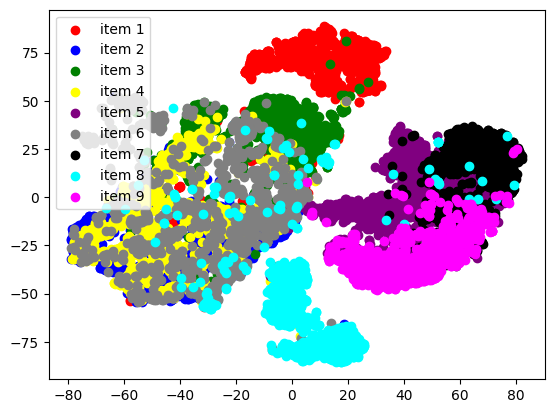

In [21]:
X = x_train_comb[:,0]
Y = x_train_comb[:,1]

plt.scatter(df['Column_A'][df.Type == 1.0],
            df['Column_B'][df.Type == 1.0],
           color='red',
           label='item 1')
plt.scatter(df['Column_A'][df.Type == 2.0],
            df['Column_B'][df.Type == 2.0],
           color='blue',
           label='item 2')
plt.scatter(df['Column_A'][df.Type == 3.0],
            df['Column_B'][df.Type == 3.0],
           color='green',
           label='item 3')
plt.scatter(df['Column_A'][df.Type == 4.0],
            df['Column_B'][df.Type == 4.0],
           color='yellow',
           label='item 4')
plt.scatter(df['Column_A'][df.Type == 5.0],
            df['Column_B'][df.Type == 5.0],
           color='purple',
           label='item 5')
plt.scatter(df['Column_A'][df.Type == 6.0],
            df['Column_B'][df.Type == 6.0],
           color='grey',
           label='item 6')
plt.scatter(df['Column_A'][df.Type == 7.0],
            df['Column_B'][df.Type == 7.0],
           color='black',
           label='item 7')
plt.scatter(df['Column_A'][df.Type == 8.0],
            df['Column_B'][df.Type == 8.0],
           color='cyan',
           label='item 8')
plt.scatter(df['Column_A'][df.Type == 9.0],
            df['Column_B'][df.Type == 9.0],
           color='magenta',
           label='item 9')
 
#plt.figure()
#plt.scatter(X, Y)

plt.legend()
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

# Appendix



## Issues

- Import, import on fashion_MNIST didnt work, resolved by looking at TensorFlow documentation where a working import was found. ()

- Shape of dataset doesnt work for DecisionTreeClassifier. Resolved by reshaping the train_x and test_x from (28, 28) to (784).  

- Error on manifold.TSNE: `UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')` was caused by sk version 0.24.1, had newer version on laptop (1.0.2) after upgrading on desktop it worked fine.



## Sources

[Tensorflow docs; loading Fasion_MNIST](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data)

[Udemy, Intro to Machine Learning, Decision Trees](https://learn.udacity.com/courses/ud120/lessons/45da7686-9785-44db-9cbc-55a0286292a3/concepts/337a88e5-b117-494f-ac66-574cdf39a35b)

[SciKit Decision Tree blogpost](https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d)

[scikit learn; RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

[scikit learn; ensemble](https://scikit-learn.org/stable/modules/ensemble.html#forest)

[scikit learn; PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)

[scikit learn; logistic regression (with softmax)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[Canvas, Decision Trees](https://fhict.instructure.com/courses/13057/pages/decision-trees)

[ADS-A ML w5 Decision Trees](../Files/ADS-A%20ML%20w5%20Decision%20Trees.pdf)

[Numpy reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)

